In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress 
import numpy as np
import math
from pathlib import Path
from scipy.odr import *

In [ ]:
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(f)

mydata = RealData(T1['meanRefPD'], T1['meanPM'])#, sx=T1['stdRefPD'])

myodr = ODR(mydata, linear, beta0=[5.e-5, 0.])

myoutput = myodr.run()€

myoutput.pprint()


x_fit = np.linspace(T1['meanRefPD'].iloc[0], np.max(T1['meanRefPD']), 1000)
y_fit = f(myoutput.beta, x_fit)

plt.errorbar(T1['meanRefPD'], T1['meanPM'],  yerr=T1['stdPM'], xerr=T1['stdRefPD'], fmt='.', markersize=10, linewidth=1, capsize=1)
plt.plot(x_fit, y_fit)
plt.show()

Stability with temperature

In [20]:
def ReadData(folderpath,FW,wavelength):
    Ttotal = pd.DataFrame()
    for filename in os.listdir(folderpath):
        if FW in filename and wavelength in filename:
            #Read and store the data
            T = pd.read_csv(f'{folderpath}/{filename}',delimiter ='\t',header=None)
            T.columns = ['date-time', 'L', 'meanPM', 'stdPM', 'meanRefPD', 'stdRefPD', 'Temp', 'RH', 'samples']
            Ttotal = pd.concat([Ttotal,T])
    return Ttotal


In [285]:
def TempStab(folderpath,FW,wavelength,outputpath):
    Ttotal = ReadData(folderpath,FW,wavelength)
    fig1, ax1 = plt.subplots()
    fig2, ax2 =plt.subplots()
    ax1.set_ylabel('Mean Optical Power (W)')
    ax1.set_xlabel('Mean ref PD (V)')
    ax1.grid()
    ax1.set_title(f'Temperature dependance {FW} {wavelength}')
    ax2.set_xlabel('Temperature')
    ax2.set_ylabel('Calibration coefficient (W/V)')
    ax2.grid()
    ax2.set_title(f'CF vs Temperature {FW} {wavelength}')
    for temp in Ttotal.groupby('Temp')['Temp']:
        if len(temp[1]) != 1:
            ax1.scatter(Ttotal[Ttotal['Temp'] == temp[0]]['meanRefPD'],Ttotal[Ttotal['Temp'] == temp[0]]['meanPM'], label=f'{temp[0]}ºC')
            res = linregress(Ttotal[Ttotal['Temp'] == temp[0]]['meanRefPD'],Ttotal[Ttotal['Temp'] == temp[0]]['meanPM'])
            ax2.errorbar(temp[0],res.slope,yerr=res.stderr, capsize= 10, fmt='.', label=f'{temp[0]}ºC')
    ax1.legend()
    ax2.legend()
    fig1.savefig(f'{outputpath}/Temperature dependance_{FW}_{wavelength}.png',dpi=199)
    fig2.savefig(f'{outputpath}/CF vs Temperature_{FW}_{wavelength}.png',dpi=199)
    



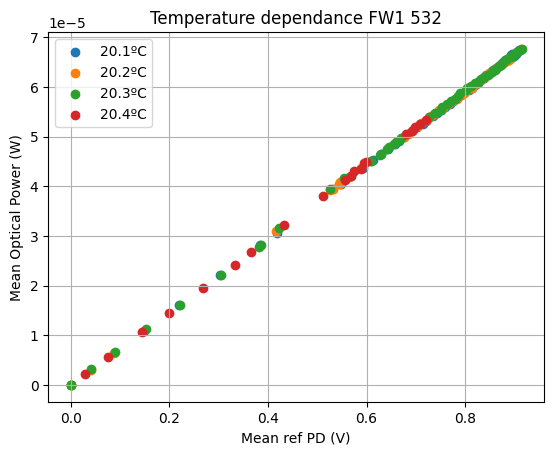

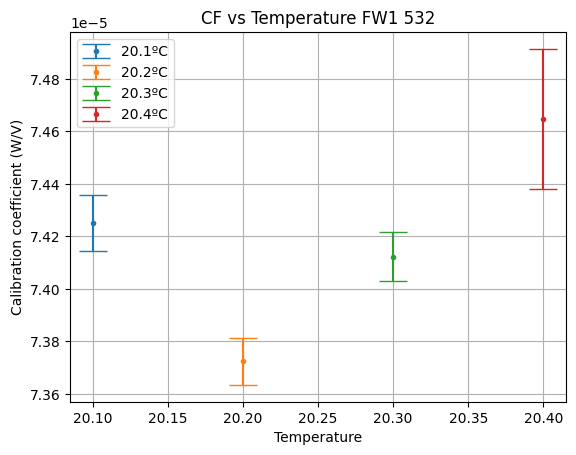

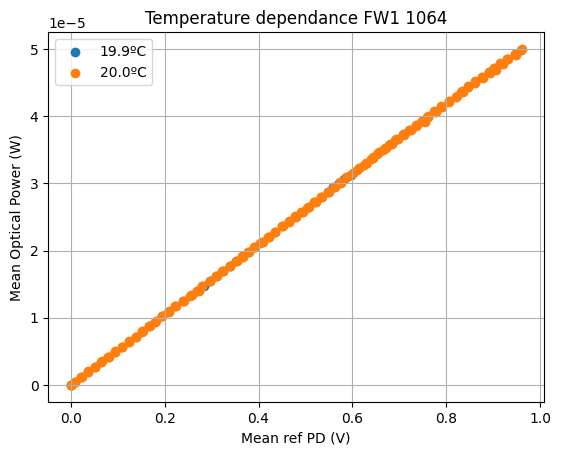

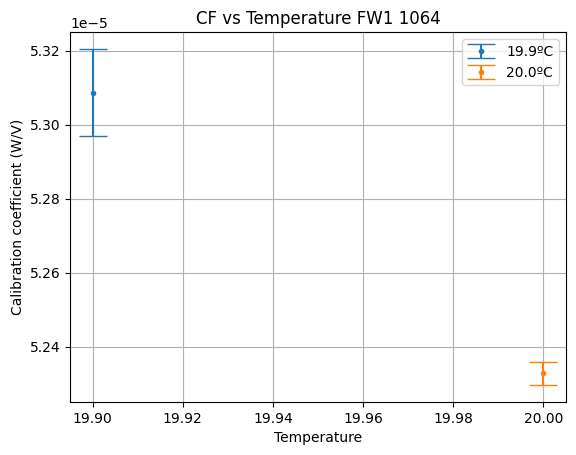

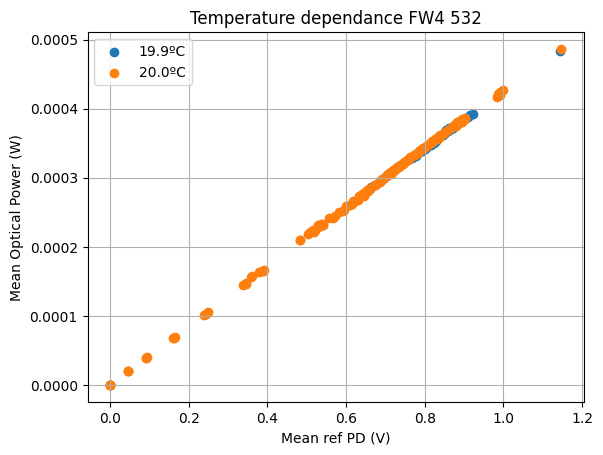

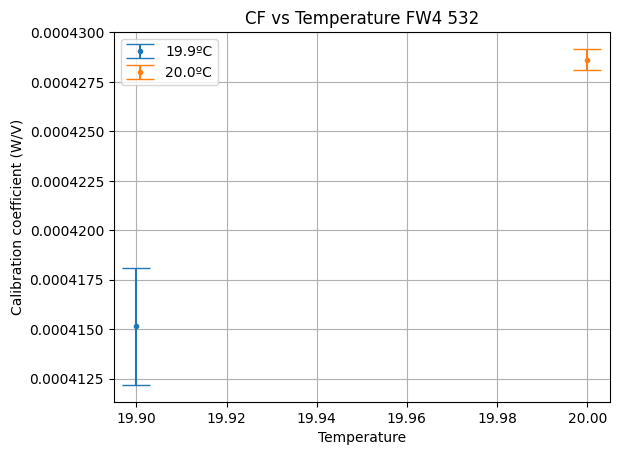

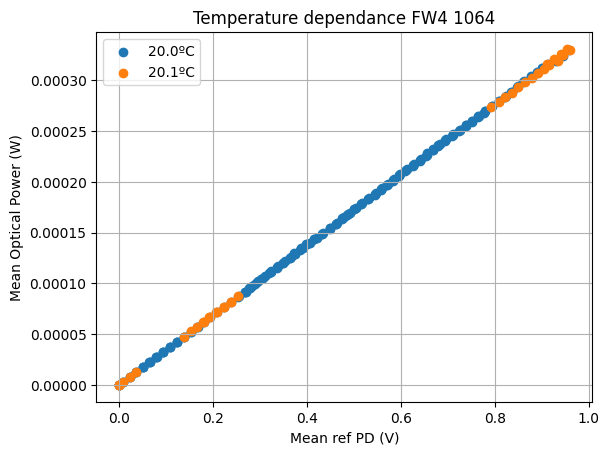

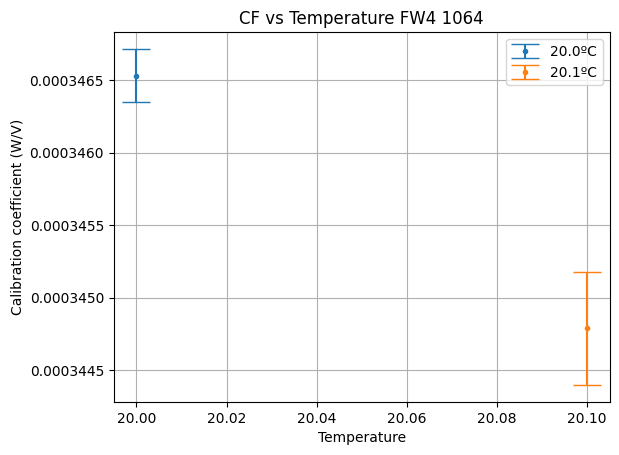

In [287]:
folderpath = './calibration_10062025'

TempStab(folderpath,"FW1","532",'./Output')
TempStab(folderpath,"FW1","1064",'./Output')
TempStab(folderpath,"FW4","532",'./Output')
TempStab(folderpath,"FW4","1064",'./Output')


# TempStab(folderpath,"FW2","532")
# TempStab(folderpath,"FW2","1064")
# TempStab(folderpath,"FW3","532")
# TempStab(folderpath,"FW3","1064")

In [286]:
def RHStab(folderpath,FW,wavelength,outputpath):
    Ttotal = ReadData(folderpath,FW,wavelength)
    fig1, ax1 = plt.subplots()
    fig2, ax2 =plt.subplots()
    ax1.set_ylabel('Mean Optical Power (W)')
    ax1.set_xlabel('Mean ref PD (V)')
    ax1.grid()
    ax1.set_title(f'RH dependance {FW} {wavelength}')
    ax2.set_xlabel('RH')
    ax2.set_ylabel('Calibration coefficient (W/V)')
    ax2.grid()
    ax2.set_title(f'CF vs RH {FW} {wavelength}')
    for RH in Ttotal.groupby('RH')['RH']:
        if len(RH[1]) != 1:
            ax1.scatter(Ttotal[Ttotal['RH'] == RH[0]]['meanRefPD'],Ttotal[Ttotal['RH'] == RH[0]]['meanPM'], label=f'{RH[0]}%')
            res = linregress(Ttotal[Ttotal['RH'] == RH[0]]['meanRefPD'],Ttotal[Ttotal['RH'] == RH[0]]['meanPM'])
            ax2.errorbar(RH[0],res.slope,yerr=res.stderr, capsize= 10, fmt='.', label=f'{RH[0]}%')
    ax1.legend()
    ax2.legend()
    fig1.savefig(f'{outputpath}/RH dependance_{FW}_{wavelength}.png',dpi=199)
    fig2.savefig(f'{outputpath}/CF vs RH_{FW}_{wavelength}.png',dpi=199)



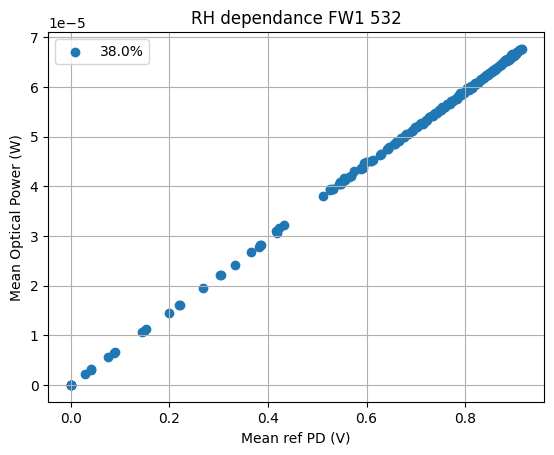

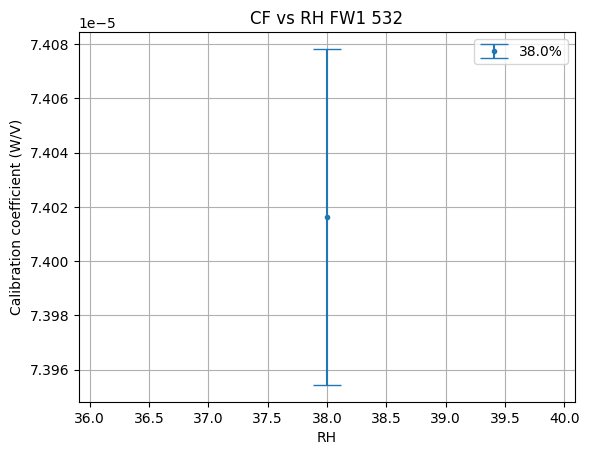

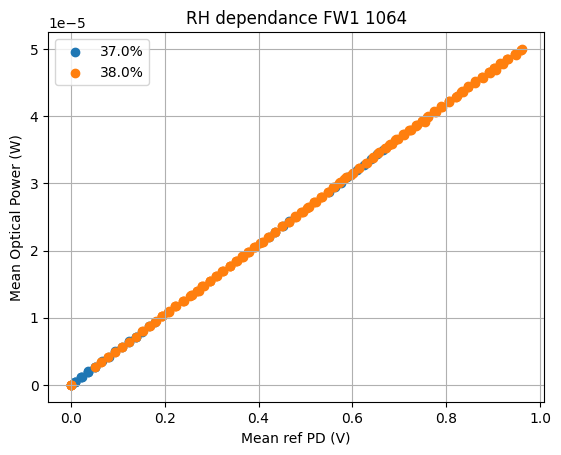

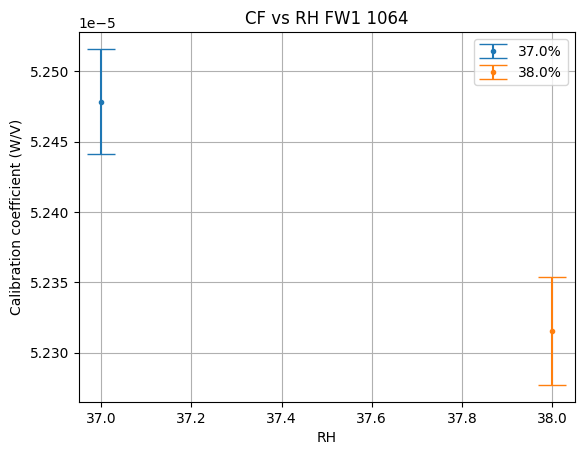

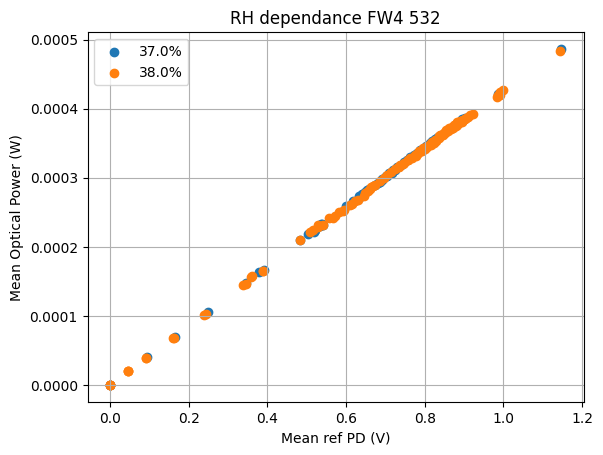

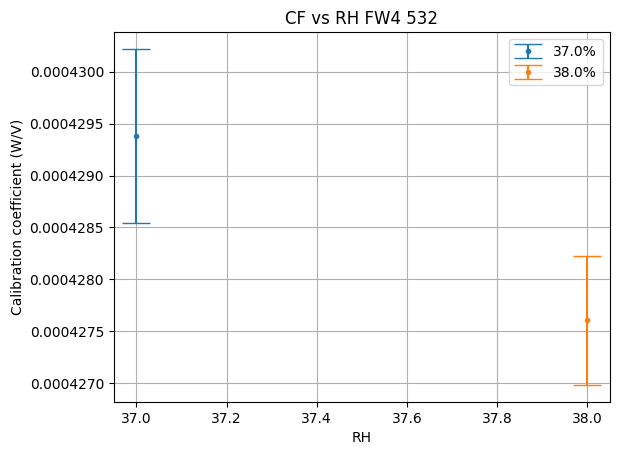

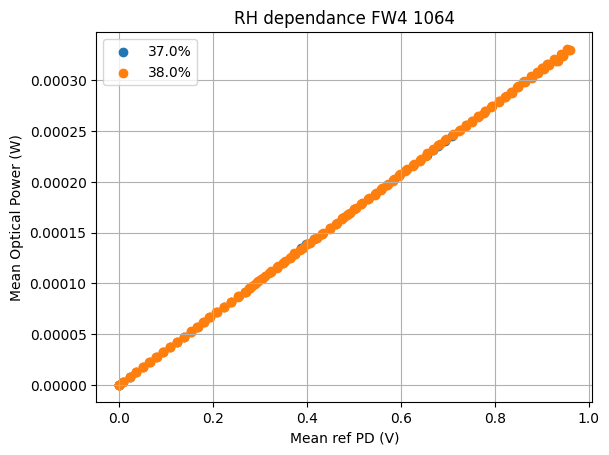

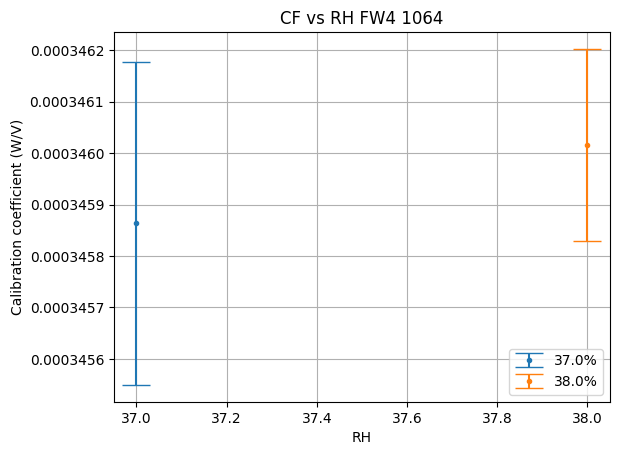

In [288]:
folderpath = './calibration_10062025'

RHStab(folderpath,"FW1","532",'./Output')
RHStab(folderpath,"FW1","1064",'./Output')
RHStab(folderpath,"FW4","532",'./Output')
RHStab(folderpath,"FW4","1064",'./Output')

# RHStab(folderpath,"FW2","532")
# RHStab(folderpath,"FW2","1064")
# RHStab(folderpath,"FW3","532")
# RHStab(folderpath,"FW3","1064")

In [297]:
#Std vs Temp
def TempStd(folderpath,FW,wavelength,outputpath):
    Ttotal = ReadData(folderpath,FW,wavelength)
    fig1, ax1 = plt.subplots()
    fig2, ax2 =plt.subplots()
    for Temp in Ttotal.groupby('Temp')['Temp']:
        ax1.scatter(Ttotal[Ttotal['Temp'] == Temp[0]]['meanRefPD'],Ttotal[Ttotal['Temp'] == Temp[0]]['stdRefPD'], label=f'{Temp[0]}ºC')
        ax1.set_ylabel('Std ref PD (V)')
        ax1.set_xlabel('Mean ref PD (V)')
        ax1.grid()
        ax1.legend()
        ax1.set_title(f'Std ref PD vs Temperature {FW} {wavelength}')
        fig1.savefig(f'{outputpath}/Std ref PD vs Temperature_{FW}_{wavelength}.png',dpi=199)
        ax2.scatter(Ttotal[Ttotal['Temp'] == Temp[0]]['meanPM'],Ttotal[Ttotal['Temp'] == Temp[0]]['stdPM'], label=f'{Temp[0]}ºC')
        ax2.set_ylabel('Std Optical Power (W)')
        ax2.set_xlabel('Mean Optical Power (W)')
        ax2.grid()
        ax2.legend()
        ax2.set_title(f'Std PM vs Temperature {FW} {wavelength}')
        fig2.savefig(f'{outputpath}/Std PM vs Temperature_{FW}_{wavelength}.png',dpi=199)




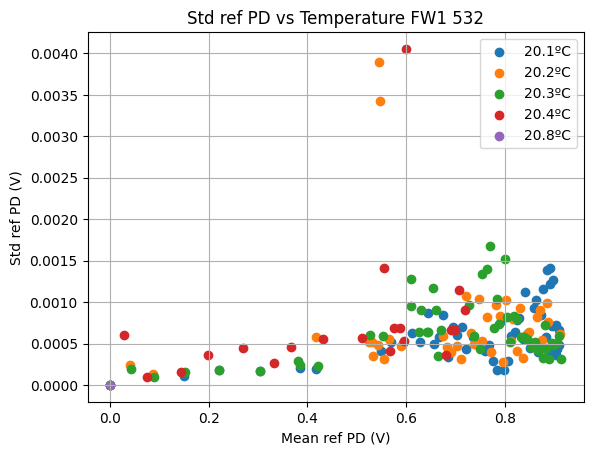

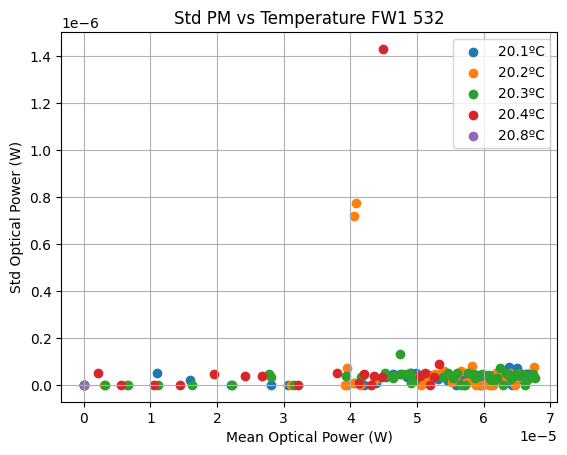

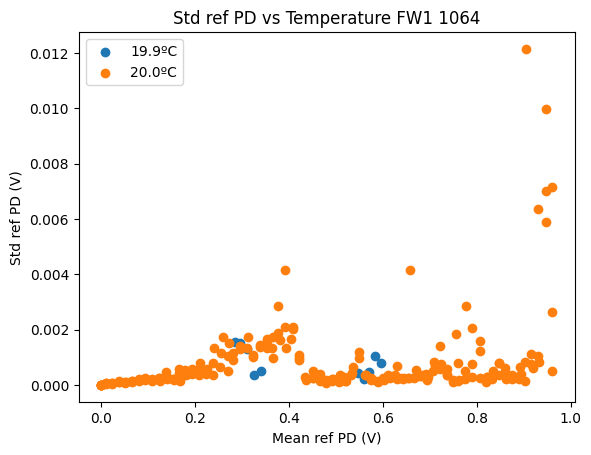

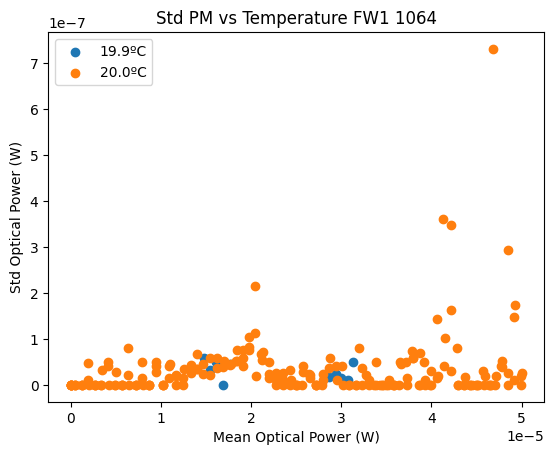

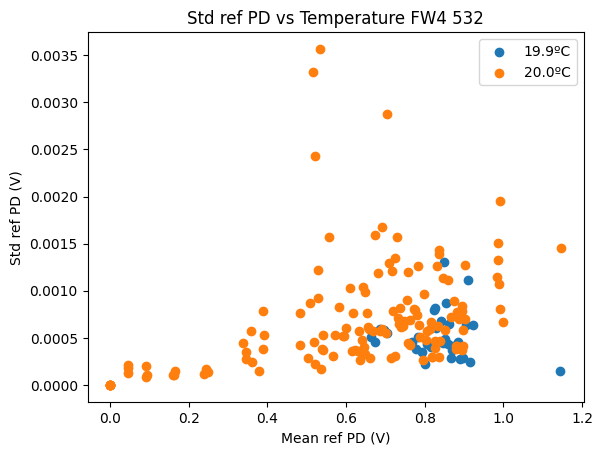

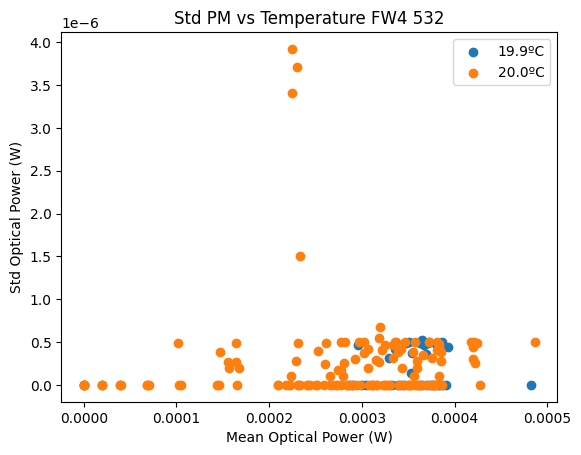

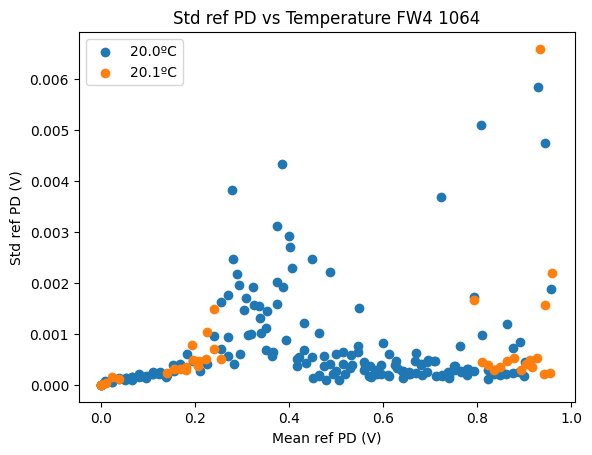

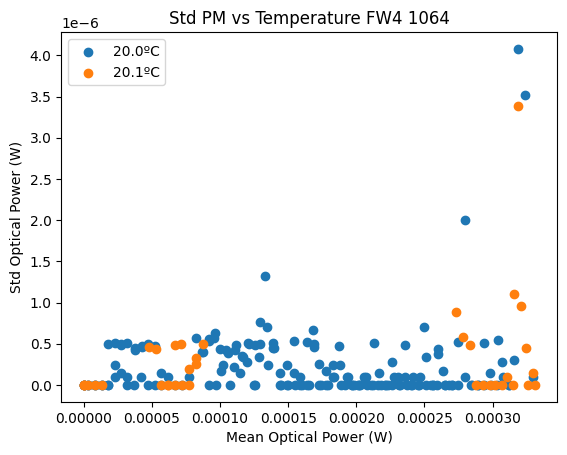

In [298]:
folderpath = './calibration_10062025'

TempStd(folderpath,"FW1","532",'./Output')
TempStd(folderpath,"FW1","1064",'./Output')
TempStd(folderpath,"FW4","532",'./Output')
TempStd(folderpath,"FW4","1064",'./Output')

In [274]:
def PlotData(folderpath,outputpath,wavelength):
    fig, ax = plt.subplots(2,2)
    for filename in os.listdir(folderpath):
        if wavelength in filename:
            #Read and store the data
            T = pd.read_csv(f'{folderpath}/{filename}',delimiter ='\t',header=None)
            T.columns = ['date-time', 'L', 'meanPM', 'stdPM', 'meanRefPD', 'stdRefPD', 'Temp', 'RH', 'samples']
            #Plot each dataset
            if 'FW1' in filename:
                ax[0,0].errorbar(T['meanPM'], T['stdPM'], fmt='.', markersize=10, linewidth=1, capsize=1, zorder=1, label='FW1' )
                ax[0,0].set_ylabel('Mean Optical Power (W)')
                ax[0,0].set_xlabel('Mean ref PD (V)')
                ax[0,0].grid()
                ax[0,0].set_title(f'All datasets ')
                ax[0,0].legend()
            if 'FW2' in filename:
                ax[1,0].errorbar(T['meanPM'], T['stdPM'], fmt='.', markersize=10, linewidth=1, capsize=1, zorder=1, label='FW2' )
                ax[1,0].set_ylabel('Mean Optical Power (W)')
                ax[1,0].set_xlabel('Mean ref PD (V)')
                ax[1,0].grid()
                ax[1,0].set_title(f'All datasets ')
                ax[1,0].legend()
            if 'FW3' in filename:
                ax[0,1].errorbar(T['meanPM'], T['stdPM'], fmt='.', markersize=10, linewidth=1, capsize=1, zorder=1, label='FW3' )
                ax[0,1].set_ylabel('Mean Optical Power (W)')
                ax[0,1].set_xlabel('Mean ref PD (V)')
                ax[0,1].grid()
                ax[0,1].set_title(f'All datasets ')
                ax[0,1].legend()
            if 'FW4' in filename:
                ax[1,1].errorbar(T['meanPM'], T['stdPM'], fmt='.', markersize=10, linewidth=1, capsize=1, zorder=1, label='FW4' )
                ax[1,1].set_ylabel('Mean Optical Power (W)')
                ax[1,1].set_xlabel('Mean ref PD (V)')
                ax[1,1].grid()
                ax[1,1].set_title(f'All datasets ')
                ax[1,1].legend()

    
    fig.savefig(f'{outputpath}/AllDatasets.png',dpi=199)
    #plt.close()
        

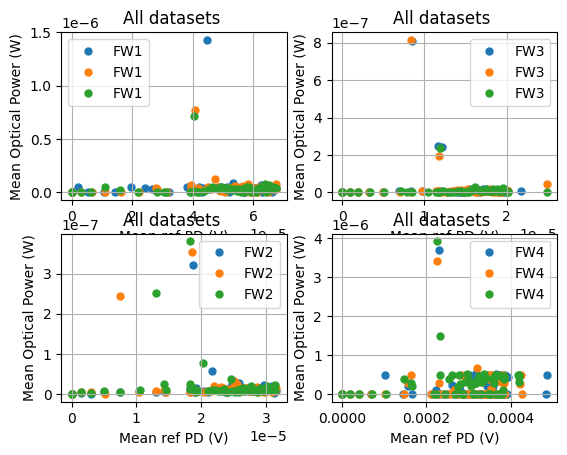

In [276]:
PlotData('./calibration_10062025','./output','532' )